In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', color_codes=True,font_scale=1.5)

from IPython.display import display
pd.options.display.max_columns=None

import warnings
warnings.filterwarnings('ignore')

# Getting a feel of the data - Grenades

In [2]:
df_grenades = pd.read_csv('mm_grenades_demos.csv')

In [3]:
df_grenades.head()

,Unnamed: 0,file,map,round,start_seconds,seconds,end_seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,winner_team,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,Team 2,NaN,76561198244806730,NaN,Terrorist,NaN,0,0,False,NaN,NaN,Decoy,Team 1,CounterTerrorist,13,NaN,-918.1018,-856.1255,257.32770,-435.8516,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,Team 2,NaN,76561198051040004,NaN,Terrorist,NaN,0,0,False,NaN,NaN,Decoy,Team 1,CounterTerrorist,17,NaN,-1310.6070,1145.8650,-1124.67500,1216.9330,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,Team 2,Team 2,76561198147933469,7.656120e+16,Terrorist,Terrorist,36,0,False,NaN,Generic,HE,Team 1,CounterTerrorist,18,18.0,-180.6393,327.6691,-89.53781,318.2151,-130.1585,304.0313,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,213.0431,281.2757,Team 1,NaN,76561198051106390,NaN,CounterTerrorist,NaN,0,0,False,NaN,NaN,Smoke,Team 2,Terrorist,16,NaN,151.3117,2304.8010,-431.48370,2126.3900,NaN,NaN,ECO,12400,4700,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,220.8572,281.2757,Team 1,NaN,76561198051106390,NaN,CounterTerrorist,NaN,0,0,False,NaN,NaN,HE,Team 2,Terrorist,16,NaN,-1669.9540,2197.1340,-1955.98500,1384.2130,NaN,NaN,ECO,12400,4700,16.0


In [4]:
df_grenades.groupby('map').count().sort_values('file',ascending=False).head()

,Unnamed: 0,file,round,start_seconds,seconds,end_seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,winner_team,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
map,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
de_mirage,99129,99129,99129,99129,99129,99129,99129,15850,99129,15850,99129,15850,99129,99129,99129,6280,15850,99129,99129,99129,99129,15850,99129,99129,99129,99129,15850,15850,99129,99129,99129,99129
de_dust2,85742,85742,85742,85742,85742,85742,85742,13040,85742,13040,85742,13040,85742,85742,85742,5470,13040,85742,85742,85742,85742,13040,85742,85742,85742,85742,13040,13040,85742,85742,85742,85742
de_cache,70687,70687,70687,70687,70687,70687,70687,9387,70687,9387,70687,9387,70687,70687,70687,5048,9387,70687,70687,70687,70687,9387,70687,70687,70687,70687,9387,9387,70687,70687,70687,70687
de_inferno,50604,50604,50604,50604,50604,50604,50604,11199,50604,11199,50604,11199,50604,50604,50604,2515,11199,50604,50604,50604,50604,11199,50604,50604,50604,50604,11199,11199,50604,50604,50604,50604
de_overpass,20902,20902,20902,20902,20902,20902,20902,2980,20902,2980,20902,2980,20902,20902,20902,1585,2980,20902,20902,20902,20902,2980,20902,20902,20902,20902,2980,2980,20902,20902,20902,20902


First we want to take a look at the most popular map, which in this case is 'Mirage'
We will try out our analysis and exploration on this one map first, before applying it across all the 21 maps.

In [5]:
df_grenades_mirage = df_grenades[df_grenades['map']=='de_mirage']
df_grenades_mirage.shape

(99129, 33)

Starting of with some basic explorations. 
1. Which side threw more grenades
2. Which side did more damage with grenades
3. Which round do grenades start appearing

[Text(0,0.5,'Number of Grenades Thrown'), Text(0.5,0,'Round')]

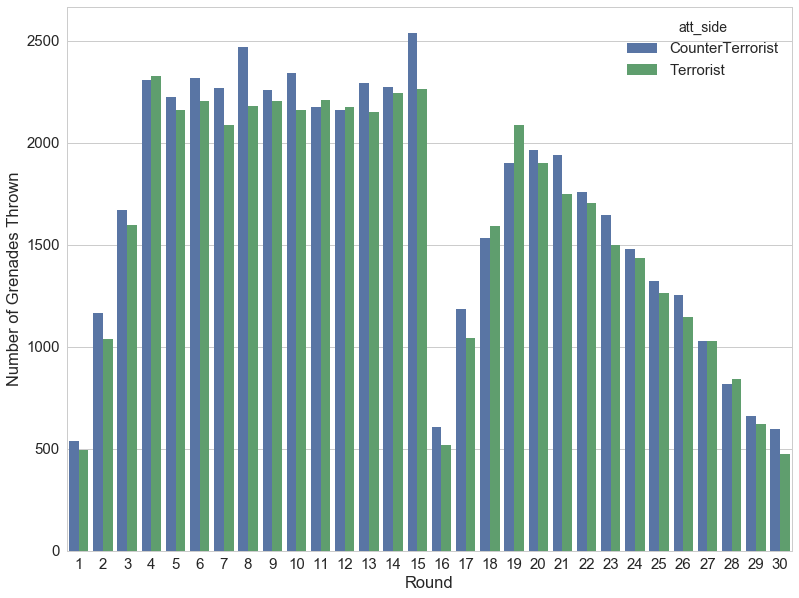

In [6]:
plotdata = df_grenades_mirage.groupby(['att_side','round']).count().reset_index()
plt.rcParams["figure.figsize"] = (13,10)
ax = sns.barplot(x='round',y='file',hue='att_side',data=plotdata)
ax.set(xlabel='Round',ylabel='Number of Grenades Thrown')

From the above, we can see that as per intuition, rounds 1 and 16 have the lowest number of grenades thrown (players start with little cash) <br>
However what is interesting to me here is that in the latter 15 rounds, use of grenades tapers off very quickly, as compared to the first 15 rounds.

In [7]:
df_grenades_mirage.groupby(['att_side']).count().ix[:,0]

att_side
CounterTerrorist    50710
Terrorist           48419
Name: Unnamed: 0, dtype: int64

As for the number of grenades used, both sides seem fairly equal. However it can be seen that Counter-Terrorists used slightly more grenades across all the rounds. This continues even after round 16 when the sides are switched, hence this can be attributed to being on the Counter-Terrorist team, rather than the team/player behaviour.

In [8]:
df_grenades_mirage.groupby('att_side').hp_dmg.sum()

att_side
CounterTerrorist    143219
Terrorist            61661
Name: hp_dmg, dtype: int64

Interestingly, counter-terrorists see a much more effective use of grenades in the Mirage map. With more than 2.3x damage done with only 1.05x more grenades thrown. CT Grenades are twice as effect as T grenades!! 

So perhaps the most important question would be, did they win? Did the side that did more damage with grenades (CT) end up winning most of the rounds?

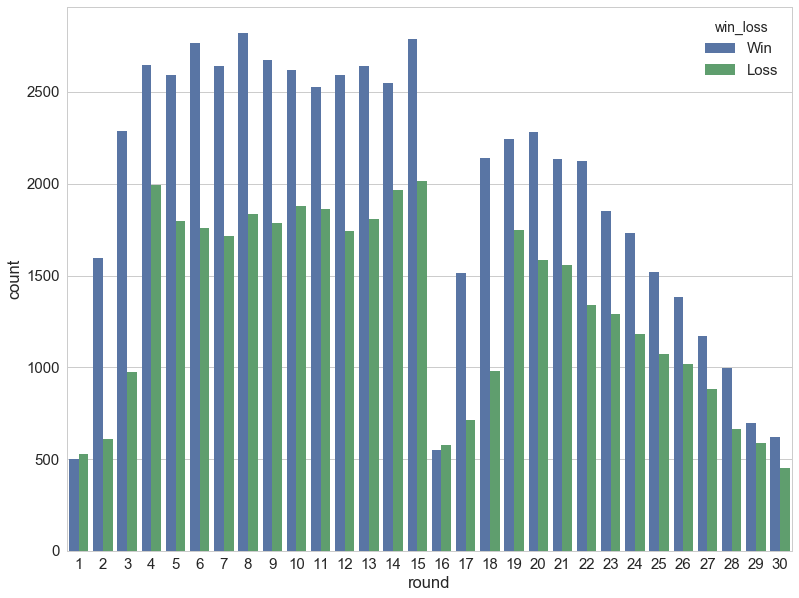

In [9]:
df_grenades_mirage["win_loss"]=np.where(df_grenades_mirage['att_side']==df_grenades_mirage['winner_side'],'Win','Loss')
sns.countplot(x='round',hue='win_loss',data=df_grenades_mirage)

From the above, we can see that if you had hit your grenade, then your team would have been more likely to win the round.<br>
So, the lesson is... Learnt to hit those grenades boys! 

# Getting a feel of the data - Maps

In [10]:
df_maps = pd.read_csv('map_data.csv')
df_maps

,Unnamed: 0,EndX,EndY,ResX,ResY,StartX,StartY
0,de_cache,3752,3187,1024,1024,-2031,-2240
1,de_cbble,2282,3032,1024,1024,-3819,-3073
2,de_dust2,2127,3455,1024,1024,-2486,-1150
3,de_inferno,2797,3800,1024,1024,-1960,-1062
4,de_mirage,1912,1682,1024,1024,-3217,-3401
5,de_overpass,503,1740,1024,1024,-4820,-3591
6,de_train,2262,2447,1024,1024,-2436,-2469


Above we have the map data. Since the map image we have are 1024 x 1024 images, we would have to scale the in game X and Y co-ordinates to fit the map resolution

In [11]:
x_scale = (1912+3217)
y_scale = (1682+3401)
def scale_x(x):
    return ((x+3217)/x_scale)*1024
def scale_y(y):
    return ((y+3401)/y_scale)*1024

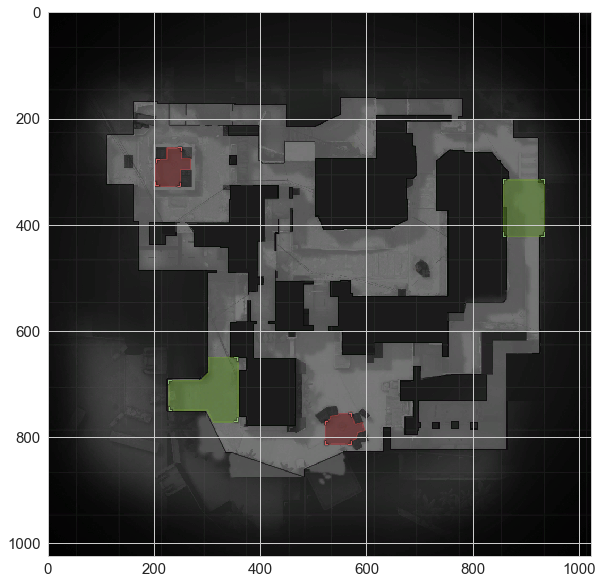

In [12]:
img = plt.imread('de_mirage.png')
fig, ax = plt.subplots()
ax.imshow(img)

Now we will convert the in-game X and Y co-ordinates into something that we can plot onto our map above.

In [13]:
df_grenades_mirage['x_coord']=df_grenades_mirage.att_pos_x.apply(scale_x)
df_grenades_mirage['y_coord']=df_grenades_mirage.att_pos_y.apply(scale_y)
df_grenades_mirage['x_coord'].head()

1681    330.842641
1682    709.574960
1683    696.170523
1684    700.636912
1685    634.354797
Name: x_coord, dtype: float64

Let's split this data into Counter-Terrorist and Terrorist and see if there are any hot spots to throw a grenade for either sides.

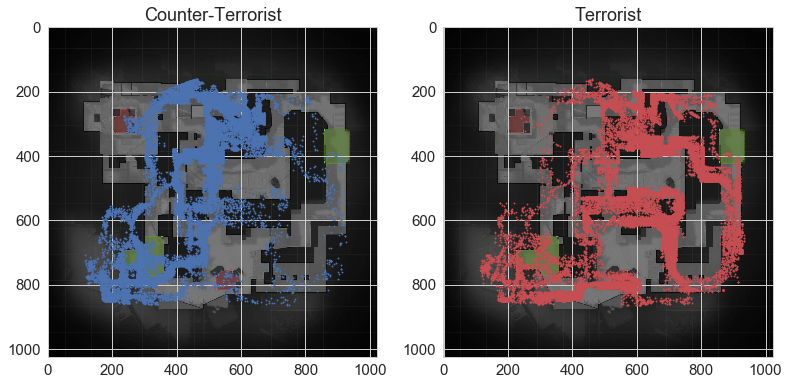

In [14]:
df_grenades_mirage_CT=df_grenades_mirage[df_grenades_mirage['att_side']=='CounterTerrorist']
df_grenades_mirage_T=df_grenades_mirage[df_grenades_mirage['att_side']=='Terrorist']
fig, ax = plt.subplots(1,2)
ax[0].scatter(df_grenades_mirage_CT['x_coord'],df_grenades_mirage_CT['y_coord'],s=2)
ax[0].set_title('Counter-Terrorist')
ax[0].imshow(img)
ax[1].scatter(df_grenades_mirage_T['x_coord'],df_grenades_mirage_T['y_coord'],s=2,c='r')
ax[1].set_title('Terrorist')
ax[1].imshow(img)

It seems the Counter-Terrorists and Terrorists both have their favourite side of the map from which to sling those grenades. <br>
The nearer you are to your respective spawn points, the more likely you are to throw a grenade. Although it seems that the terrorists tend to venture out further. This makes sense given that the terrorists are the ones who have to overrun the map and get to the bomb sites whereas the Counter tends to stay in one place and defend to bomb sites

# Getting a feel of the data - Master Demo

In [15]:
df_master = pd.read_csv('mm_master_demos.csv')

In [16]:
df_master.shape

(955466, 33)

As per normal, let's focus on the mirage map data first

In [32]:
df_master_mirage = df_master[df_master['map']=='de_mirage']

In [33]:
df_master_mirage.shape

(267436, 33)

In [34]:
df_master_mirage.head()

,Unnamed: 0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,award,winner_team,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
4269,0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,Terrorist,100,0,False,NaN,Head,USP,Pistol,300,Team 2,Terrorist,76561198115686363,16,76561198370068230,16,-359.5016,389.7257,-468.7209,529.1569,PISTOL_ROUND,4250,4200,15.0
4270,1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,CounterTerrorist,15,8,False,NaN,Stomach,Glock,Pistol,300,Team 2,Terrorist,76561198355692407,17,76561198115686363,16,-650.1707,520.0313,-352.4009,392.1384,PISTOL_ROUND,4250,4200,15.0
4271,2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,CounterTerrorist,85,0,False,NaN,Head,Glock,Pistol,300,Team 2,Terrorist,76561198355692407,17,76561198115686363,16,-650.1707,520.0313,-335.1208,401.2988,PISTOL_ROUND,4250,4200,15.0
4272,3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,Terrorist,100,0,False,NaN,Head,USP,Pistol,300,Team 2,Terrorist,76561198152153688,16,76561198301910020,13,-2064.0290,793.1069,-1575.5010,685.9157,PISTOL_ROUND,4250,4200,15.0
4273,4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,CounterTerrorist,100,0,False,NaN,Head,USP,Pistol,300,Team 2,Terrorist,76561198355692407,17,76561198152153688,16,-1090.8520,677.1235,-2063.8480,793.9529,PISTOL_ROUND,4250,4200,15.0


Some questions that we may want answers to:
1. Which gun does the most damage (total)
2. Which gun is the most widely used
3. Which hitbox is targeted the most
4. Which guns are used/bought in correlation to the team's total value

In [35]:
data = df_master_mirage.groupby(['wp_type','wp']).sum()

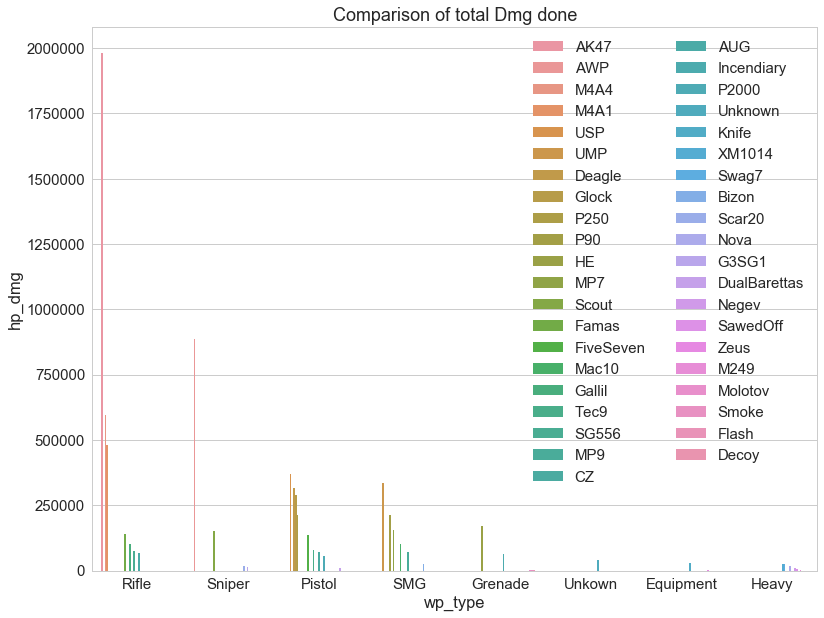

In [36]:
ax = plt.subplot()
g = sns.barplot(x='wp_type',y='hp_dmg',hue='wp',ax=ax,data=data.sort_values('hp_dmg',ascending=False).reset_index()).set_title('Comparison of total Dmg done')
ax.legend(ncol=2,loc='upper right')

Although the plot above is very tiny, it is evident that the AK47 tops the damage chart by a huge margin. Even the AWP in 2nd place is less than half the total damage of the AK47.
Next we want to find out if this huge disparity is caused by the a-higher frequency of use of the AK47 b-or is the damage and accuracy of the AK47 just that effective

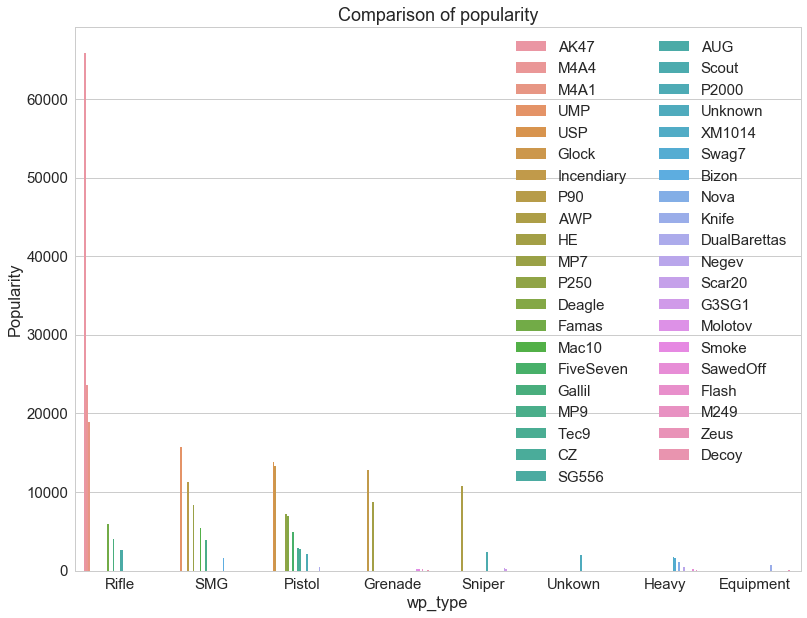

In [22]:
data = df_master_mirage.groupby(['wp_type','wp']).count()

ax = sns.barplot(x='wp_type',y='hp_dmg',hue='wp',data=data.sort_values('hp_dmg',ascending=False).reset_index())
ax.set_title('Comparison of popularity')
ax.set_ylabel('Popularity')
ax.legend(ncol=2,loc='upper right')

As can be seen, the AK47 has seena  high usage rate, about 3 times of its closest competitor M4A4.<br>
I guess we can safely say that the AK47 is almost everyone's weapon of choice in the mirage map. However, let's take the AK47 out of the picture for a moment so that we can have a better understanding of where the other weapons stand as well

In [44]:
df_master_mirage=df_master_mirage[df_master_mirage['wp']!='AK47']

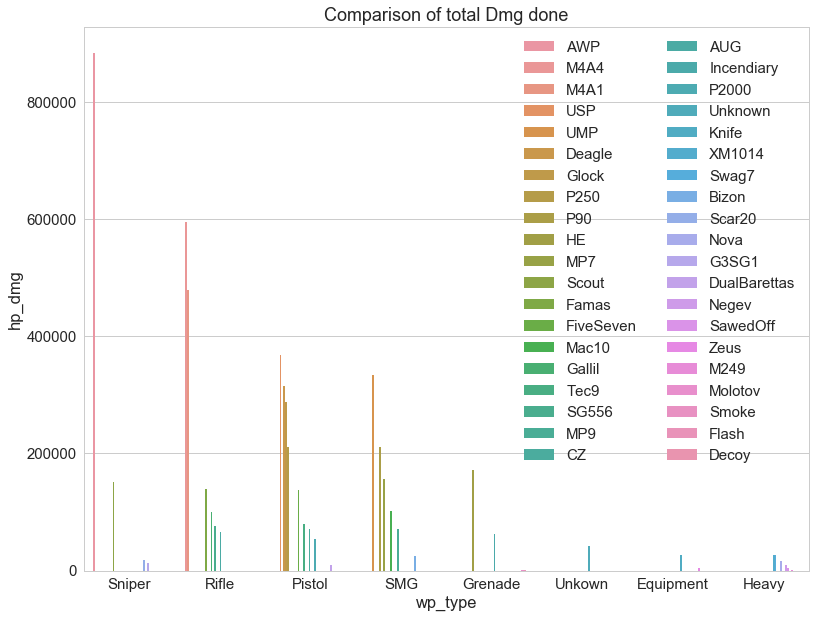

In [24]:
data = df_master_mirage.groupby(['wp_type','wp']).sum()
ax = plt.subplot()
sns.barplot(x='wp_type',y='hp_dmg',hue='wp',ax=ax,data=data.sort_values('hp_dmg',ascending=False).reset_index()).set_title('Comparison of total Dmg done')
ax.legend(ncol=2)

Even with the AK47 out of the picture, we still see a few hot favourites such as the all famous AWP, M4A4 and M4A1 taking the lead.<br>
Surprisingly, there are a few pistols that are in the top 10 spot as well. Let's take a closer look

Text(0.5,1,'Comparison of total Dmg done')

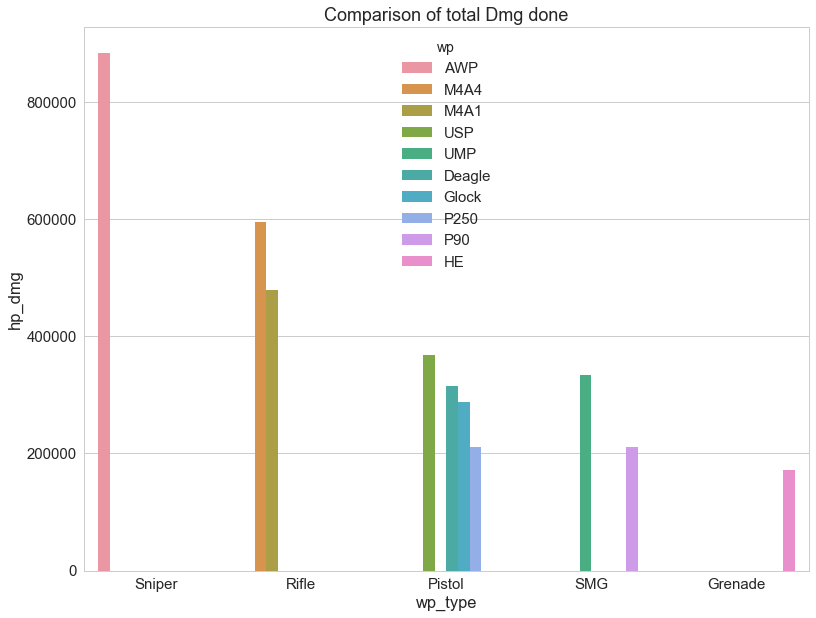

In [25]:
sns.barplot(x='wp_type',y='hp_dmg',hue='wp',data=data.sort_values('hp_dmg',ascending=False).reset_index().head(10)).set_title('Comparison of total Dmg done')

So there you have it, the top 2nd to 11th place in damage rankings, with AK47 as the reigning king.

Now let's try to figure which gun is the most accurate (i.e giving the most head shots)

In [58]:
data = df_master_mirage.groupby(['hitbox','wp']).count().sort_values('hp_dmg',ascending=False).reset_index()
data_head = data[data['hitbox']=='Head']
data = df_master_mirage.groupby('wp').count().sort_values('hp_dmg',ascending=False).reset_index()
join = data.merge(data_head,on='wp')
join = join[['hitbox_x','wp','file_x','file_y']]
join['accuracy']=join['file_y']/join['file_x']
join.sort_values('accuracy',ascending=False,inplace=True)
join.head()

,hitbox_x,wp,file_x,file_y,accuracy
19,2330,Scout,2330,505,0.216738
3,13803,USP,13803,2844,0.206042
9,6983,Deagle,6983,1414,0.202492
20,2052,P2000,2052,401,0.195419
8,7239,P250,7239,1360,0.187871


Text(0,0.5,'Count')

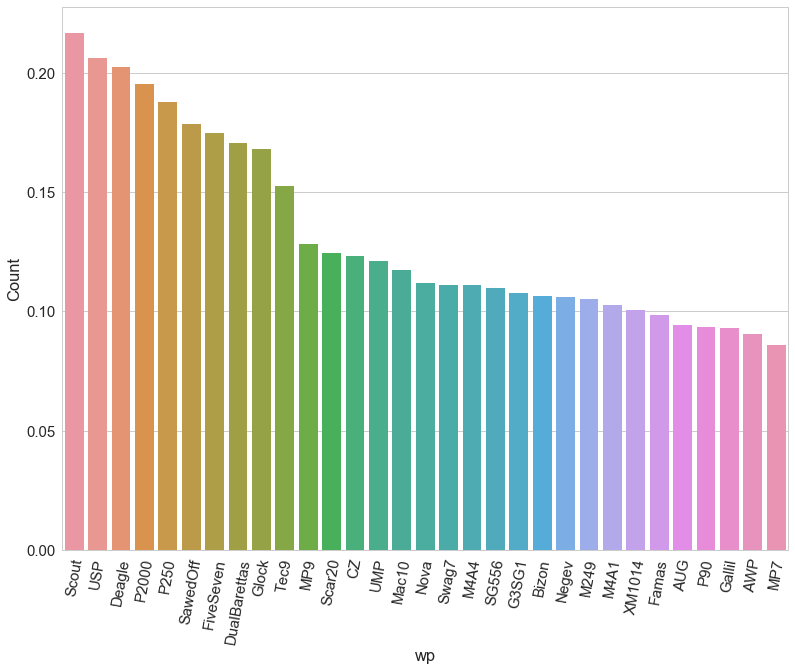

In [59]:
ax = sns.barplot(x='wp',y='accuracy',data=join)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.set_ylabel('Count')

Seems like most shots in the head are by pistol wielders, with some rifles up there in the top spots as well.

Now let's try to figure out the types of guns people buy, in relation to their $ value. We will most likely see pistols and maybe SMG bought during ECO rounds. And AWPs and rifles being purchased when everyone is feeling rich and going all out. Let's take a look

In [28]:
df_master_mirage['att_team_val']=np.where(df_master_mirage['att_side']=='CounterTerrorist', df_master_mirage['ct_eq_val'], df_master_mirage['t_eq_val'])
data=df_master_mirage.groupby(['wp_type','att_team_val'])
data

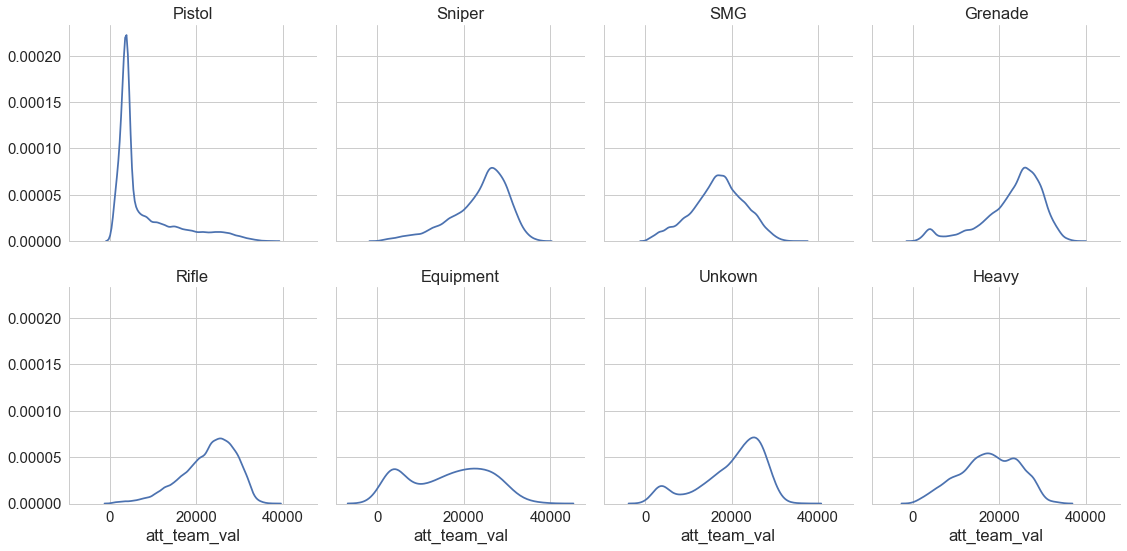

In [29]:
g = sns.FacetGrid(df_master_mirage,col='wp_type',col_wrap=4,size=4)
g.map(sns.distplot,'att_team_val',hist=False).set_titles("{col_name}")

So the x axis is how much money the whole team has, starting with 0 from the left. <br>
As can be seen, pistols are very popular up to the 5000 mark. Then they usually transit to SMGs at the 20,000 mark and then Snipers and Rifles at the 25,000 to 30,000 range.